In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [4]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    return np.linalg.lstsq(np.transpose(tx).dot(tx), np.transpose(tx).dot(y),rcond=None)[0]
    #return np.linalg.solve(np.transpose(tx).dot(tx), np.transpose(tx).dot(y))

    

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [5]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    return least_squares(y,tx)

Test it here

In [6]:
test_your_least_squares()

array([73.293922  , 13.47971243])

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [7]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [8]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE)],degree)
    Phi=np.zeros((x.size,degree+1))
    
    for i in range(degree):
        Phi[:,i]=x**i
    return Phi

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [9]:
from plots import *
from gradient_descent import gradient_descent

def polynomial_regression(x,y):
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 11]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)
    
    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        phi=build_poly(x, degree)
        initial_w=np.ones((degree+1,1))
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        weights=least_squares(y,phi)
        rmse=(2*compute_mse(y-phi.dot(weights)))**0.5
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.7078805834165345
Processing 2th experiment, degree=3, rmse=0.466981968954414
Processing 3th experiment, degree=7, rmse=0.24969890274508555
Processing 4th experiment, degree=11, rmse=0.2982885114490936


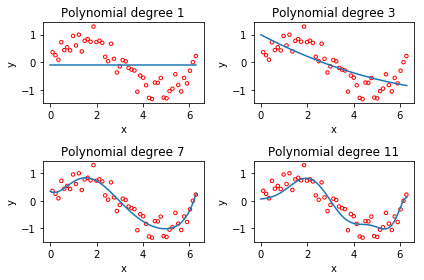

In [10]:
polynomial_regression(x,y)

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [11]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    n=x.shape[0]
    indices = np.random.permutation(n)
    training_idx, test_idx = indices[:int(n*ratio)], indices[int(n*ratio):]
    x_training, x_test = x[training_idx], x[test_idx]
    y_training, y_test = y[training_idx], y[test_idx]
    
    return x_training, x_test, y_training, y_test


Then, test your `split_data` function below.

In [15]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    xtr,xte,ytr,yte = split_data(x,y,ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    phitr=build_poly(xtr,degree)
    phite=build_poly(xte,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    weights=least_squares(ytr,phitr)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr=(2*compute_mse(ytr-phitr.dot(weights)))**0.5
    rmse_te=(2*compute_mse(yte-phite.dot(weights)))**0.5
    
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [16]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.717, Testing RMSE=0.623
proportion=0.9, degree=3, Training RMSE=0.454, Testing RMSE=0.602
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.184
proportion=0.9, degree=12, Training RMSE=0.457, Testing RMSE=0.753
proportion=0.5, degree=1, Training RMSE=0.683, Testing RMSE=0.754
proportion=0.5, degree=3, Training RMSE=0.396, Testing RMSE=0.573
proportion=0.5, degree=7, Training RMSE=0.223, Testing RMSE=0.334
proportion=0.5, degree=12, Training RMSE=0.499, Testing RMSE=0.604
proportion=0.1, degree=1, Training RMSE=0.912, Testing RMSE=0.686
proportion=0.1, degree=3, Training RMSE=0.227, Testing RMSE=1.799
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=1.275
proportion=0.1, degree=12, Training RMSE=0.417, Testing RMSE=120.572


# 3 Ridge Regression
Please fill in the function below.

In [1]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    return np.linalg.lstsq(np.transpose(tx).dot(tx)+lambda_*np.eye(tx.shape[1]), np.transpose(tx).dot(y),rcond=None)[0]
    

In [2]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    return ridge_regression(y,tx,0)

test_your_least_squares()

array([73.293922  , 13.47971243])

In [50]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    xtr,xte,ytr,yte = split_data(x,y,ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    phitr=build_poly(xtr,degree)
    phite=build_poly(xte,degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        weights=ridge_regression(ytr,phitr,lambda_)
        
        rmse_tr.append(2*compute_mse(ytr-phitr.dot(weights))**0.5)
        rmse_te.append(2*compute_mse(yte-phite.dot(weights))**0.5)
        
        
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)



proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.315, Testing RMSE=0.473
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.315, Testing RMSE=0.472
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.315, Testing RMSE=0.472
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.315, Testing RMSE=0.471
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.316, Testing RMSE=0.468
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.316, Testing RMSE=0.464
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.316, Testing RMSE=0.456
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.318, Testing RMSE=0.448
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.320, Testing RMSE=0.441
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.322, Testing RMSE=0.437
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.324, Testing RMSE=0.432
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.327, Testing RMSE=0.424
proportion=0.5, degree=7, lambda=0.193, 

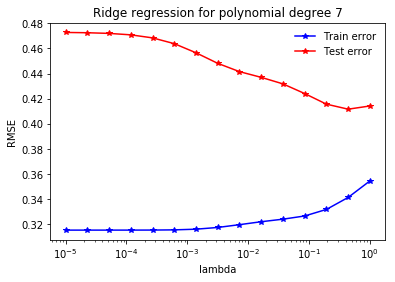

In [52]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)